In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

# 1a. Data Inspection
print("Missing values check:")
print(df.isna().sum())

# 1b. Recommendations for missing data:
# Since the dataset is clean (0 nulls), no rows were dropped. 
# If there were nulls, we would use df.fillna() for small gaps or df.dropna() for large ones.

# 1c. Data Normalization (Min-Max Scaling)
# Normalization is preferred to bring Sales and Units to a 0-1 scale.
df_normalized = df.copy()
for column in ['Unit', 'Sales']:
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

print("\nNormalized Data (First 5 rows):")
print(df_normalized.head())

Missing values check:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Normalized Data (First 5 rows):
         Date        Time State     Group      Unit     Sales
0  1-Oct-2020     Morning    WA      Kids  0.095238  0.095238
1  1-Oct-2020     Morning    WA       Men  0.095238  0.095238
2  1-Oct-2020     Morning    WA     Women  0.031746  0.031746
3  1-Oct-2020     Morning    WA   Seniors  0.206349  0.206349
4  1-Oct-2020   Afternoon    WA      Kids  0.015873  0.015873


1d. GroupBy Insight
GroupBy is essential for 'chunking' the data into states or demographics 
to calculate specific performance metrics.

In [2]:
# 2a. Descriptive Statistical Analysis
sales_stats = df[['Sales', 'Unit']].describe()
mode_sales = df['Sales'].mode()[0]
mode_unit = df['Unit'].mode()[0]

print("\nDescriptive Statistics:")
print(sales_stats)
print(f"Sales Mode: {mode_sales}, Unit Mode: {mode_unit}")

# 2b & 2c. Identify Highest and Lowest Sales Groups/States
group_performance = df.groupby('Group')['Sales'].sum().sort_values()
state_performance = df.groupby('State')['Sales'].sum().sort_values()

print(f"\nHighest Sales Group: {group_performance.idxmax()}")
print(f"Lowest Sales Group: {group_performance.idxmin()}")
print(f"Highest Sales State: {state_performance.idxmax()}")
print(f"Lowest Sales State: {state_performance.idxmin()}")

# 2d. Generate Time-based Reports
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Week'] = df['Date'].dt.isocalendar().week

monthly_report = df.groupby('Month')['Sales'].sum()
weekly_report = df.groupby('Week')['Sales'].sum()

print("\nMonthly Revenue:")
print(monthly_report)


Descriptive Statistics:
               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000
Sales Mode: 22500, Unit Mode: 9

Highest Sales Group:  Men
Lowest Sales Group:  Seniors
Highest Sales State:  VIC
Lowest Sales State:  WA

Monthly Revenue:
Month
December    135330000
November     90682500
October     114290000
Name: Sales, dtype: int64


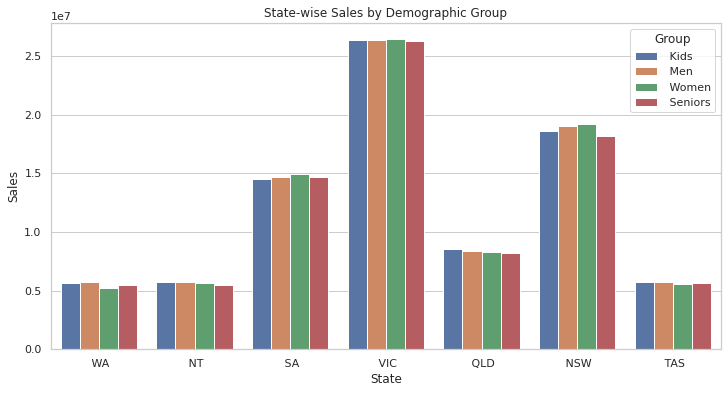

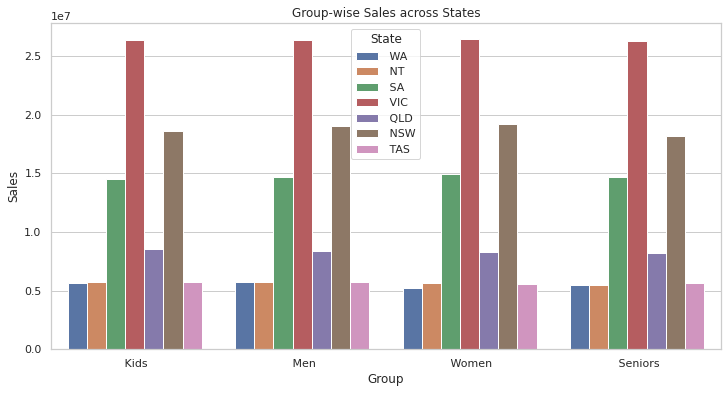

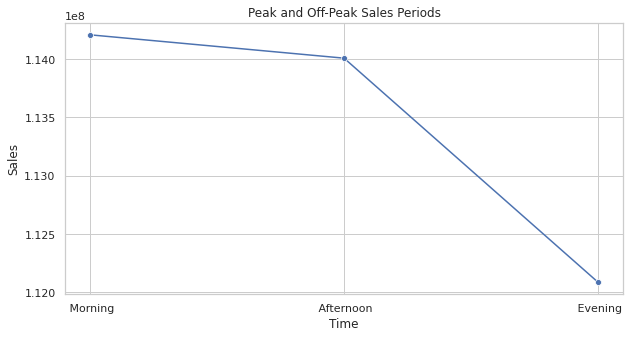

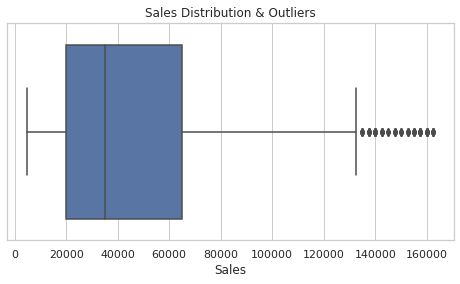

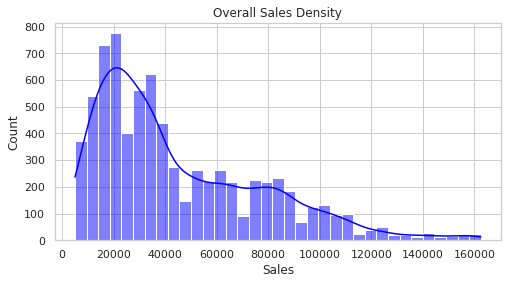

In [7]:
# Set visual style
sns.set_theme(style="whitegrid")

# 3a. State-wise sales for different demographic groups
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group', estimator=sum, errorbar=None)
plt.title('State-wise Sales by Demographic Group')
plt.show()

# 3b. Group-wise sales across various states
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Group', y='Sales', hue='State', estimator=sum, errorbar=None)
plt.title('Group-wise Sales across States')
plt.show()

# 3c. Time-of-the-day analysis (Peak vs Off-peak)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Time', y='Sales', estimator=sum, errorbar=None, marker='o')
plt.title('Peak and Off-Peak Sales Periods')
plt.show()

# Box Plot for Descriptive Statistics
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Sales'])
plt.title('Sales Distribution & Outliers')
plt.show()

# Distribution Plot
plt.figure(figsize=(8, 4))
sns.histplot(df['Sales'], kde=True, color='blue')
plt.title('Overall Sales Density')
plt.show()

Final Recommendations:

1. Focus on VIC: Victoria is the highest revenue generator; marketing spend should be maintained here to ensure market dominance.

2. Revitalize WA: Western Australia shows the lowest revenue. We recommend a "State-specific Discount" program to increase brand penetration.

3. Demographic Target: The "Seniors" group has the lowest sales. AAL should consider a loyalty program or a specific clothing line designed for comfort to attract this age group.

4. Peak Hour Strategy: Use the Time-of-day analysis to schedule "Flash Sales" during off-peak hours (as identified in the line chart) to normalize store traffic.